In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how='left', on='city')
combined_df.head(5)
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

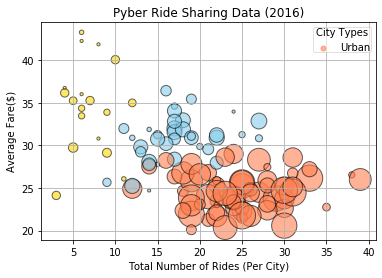

In [78]:
# Show plot
city_group = combined_df.groupby("city").agg({'fare':'mean',
                                              'ride_id':'count',
                                              'driver_count':'max',
                                                'type': 'max'  })
city_group

city_renamed = city_group.rename(columns={"fare": "Avg_Fare", "ride_id": "Rider_Count", 
                                            "driver_count": "Drivers", "type": "Type"})

col_dictionary = {'Urban': "coral", 
              'Suburban': "Skyblue", 
              'Rural': "gold"}

city_renamed['Color'] = city_renamed['Type'].map(col_dictionary)

plt.scatter(city_renamed.Rider_Count, city_renamed.Avg_Fare, s=[city_renamed.Drivers*10],
            c=city_renamed.Color, alpha=.6, edgecolors='black', label=city_renamed.Color)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid()

#Did not know how to put all city types in the legend!
colors = ["coral", "Skyblue", "gold"]
labels = ["Urban", "Suburban", "Rural"]
    
for i in range(len(colors)):
    legend = plt.legend(labels=labels, numpoints=1, borderpad=0, frameon=True, framealpha=0.6, title="City Types")
i=0
for handle in legend.legendHandles:
    handle.set_sizes([25.0])
    handle.set_color(colors[i])
    handle.set_label(labels[i])
    i =+ 1
plt.show()

## Total Fares by City Type

C:\Users\lisph\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


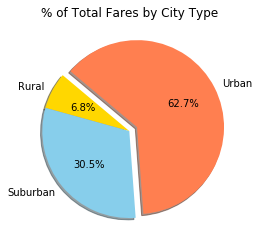

In [19]:
# Calculate Type Percents
fare_tot = combined_df['fare'].sum()
labels = combined_df['type'].unique()
sort_labels = labels
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
type_group = combined_df.groupby("type").agg({'fare':'sum'
                                               })

# Build Pie Chart
real_group = (type_group/fare_tot)*100
plt.pie(real_group, explode=explode, labels=sorted(labels), colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.savefig
plt.show()

## Total Rides by City Type

C:\Users\lisph\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


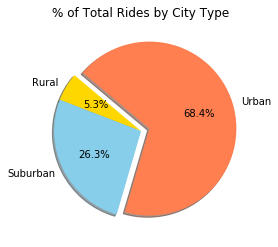

In [21]:
# Calculate Ride Percents
ride_tot = combined_df['ride_id'].count()
labels = combined_df['type'].unique()
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
type_ride = combined_df.groupby("type").agg({'ride_id':'count'
                                               })
group = (type_ride/ride_tot)*100
plt.pie(group, explode=explode, labels=sorted(labels), colors=colors, shadow=True, autopct='%.1f%%', startangle=140)
plt.title("% of Total Rides by City Type")
plt.savefig
plt.show()



## Total Drivers by City Type

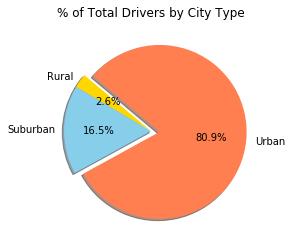

In [22]:
# Calculate Driver Percents
labels = combined_df['type'].unique()
explode = (0, 0, 0.1)
colors = ["gold", "Skyblue", "coral"]
city_pies = city_renamed.groupby("Type").agg({'Drivers':'sum',
                                              })
city_pies
city_pies['p_driver'] = round(city_pies['Drivers']/city_pies['Drivers'].sum() * 100,2)
plt.pie(city_pies['p_driver'], explode=explode, labels=sorted(labels), colors = colors,
        shadow=True, autopct='%.1f%%', startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig
plt.show()

